<a href="https://colab.research.google.com/github/mk7890/Python_Data_Analysis/blob/main/heart2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
heart=pd.read_csv('/content/heart_2022_with_nans.csv')
heart.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      47297 non-null  object 
 1   Sex                        47297 non-null  object 
 2   GeneralHealth              47149 non-null  object 
 3   PhysicalHealthDays         45819 non-null  float64
 4   MentalHealthDays           46055 non-null  float64
 5   LastCheckupTime            46244 non-null  object 
 6   PhysicalActivities         47157 non-null  object 
 7   SleepHours                 46707 non-null  float64
 8   RemovedTeeth               44935 non-null  object 
 9   HadHeartAttack             46883 non-null  object 
 10  HadAngina                  46785 non-null  object 
 11  HadStroke                  47071 non-null  object 
 12  HadAsthma                  47045 non-null  object 
 13  HadSkinCancer              46889 non-null  obj

In [6]:
heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [8]:
heart.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,148
PhysicalHealthDays,1478
MentalHealthDays,1242
LastCheckupTime,1053
PhysicalActivities,140
SleepHours,590
RemovedTeeth,2362
HadHeartAttack,414


In [9]:
#Percentage of missing values
heart.isnull().sum()/len(heart)*100

,0
State,0.000000
Sex,0.000000
GeneralHealth,0.312916
PhysicalHealthDays,3.124934
MentalHealthDays,2.625959
LastCheckupTime,2.226357
PhysicalActivities,0.296002
SleepHours,1.247436
RemovedTeeth,4.993974
HadHeartAttack,0.875320


<Figure size 1200x600 with 0 Axes>

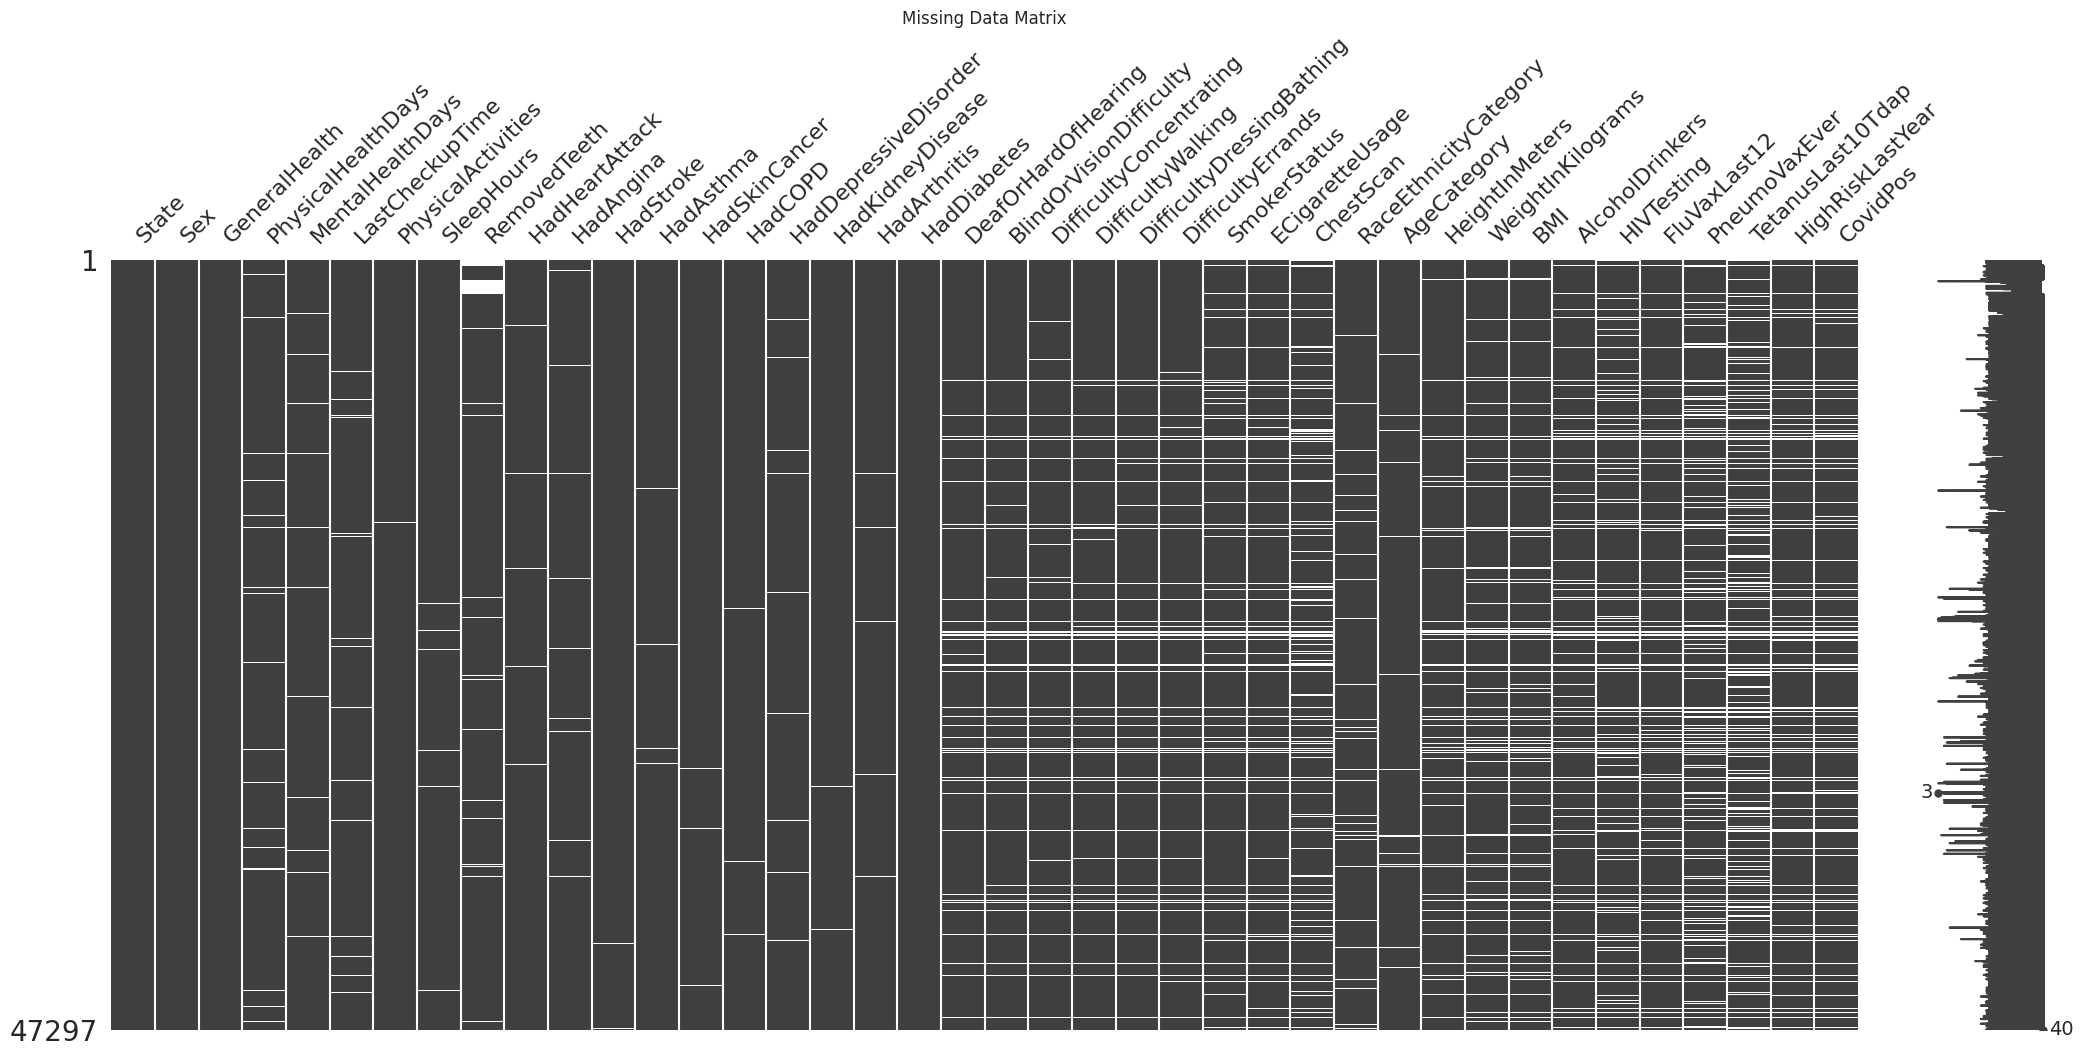

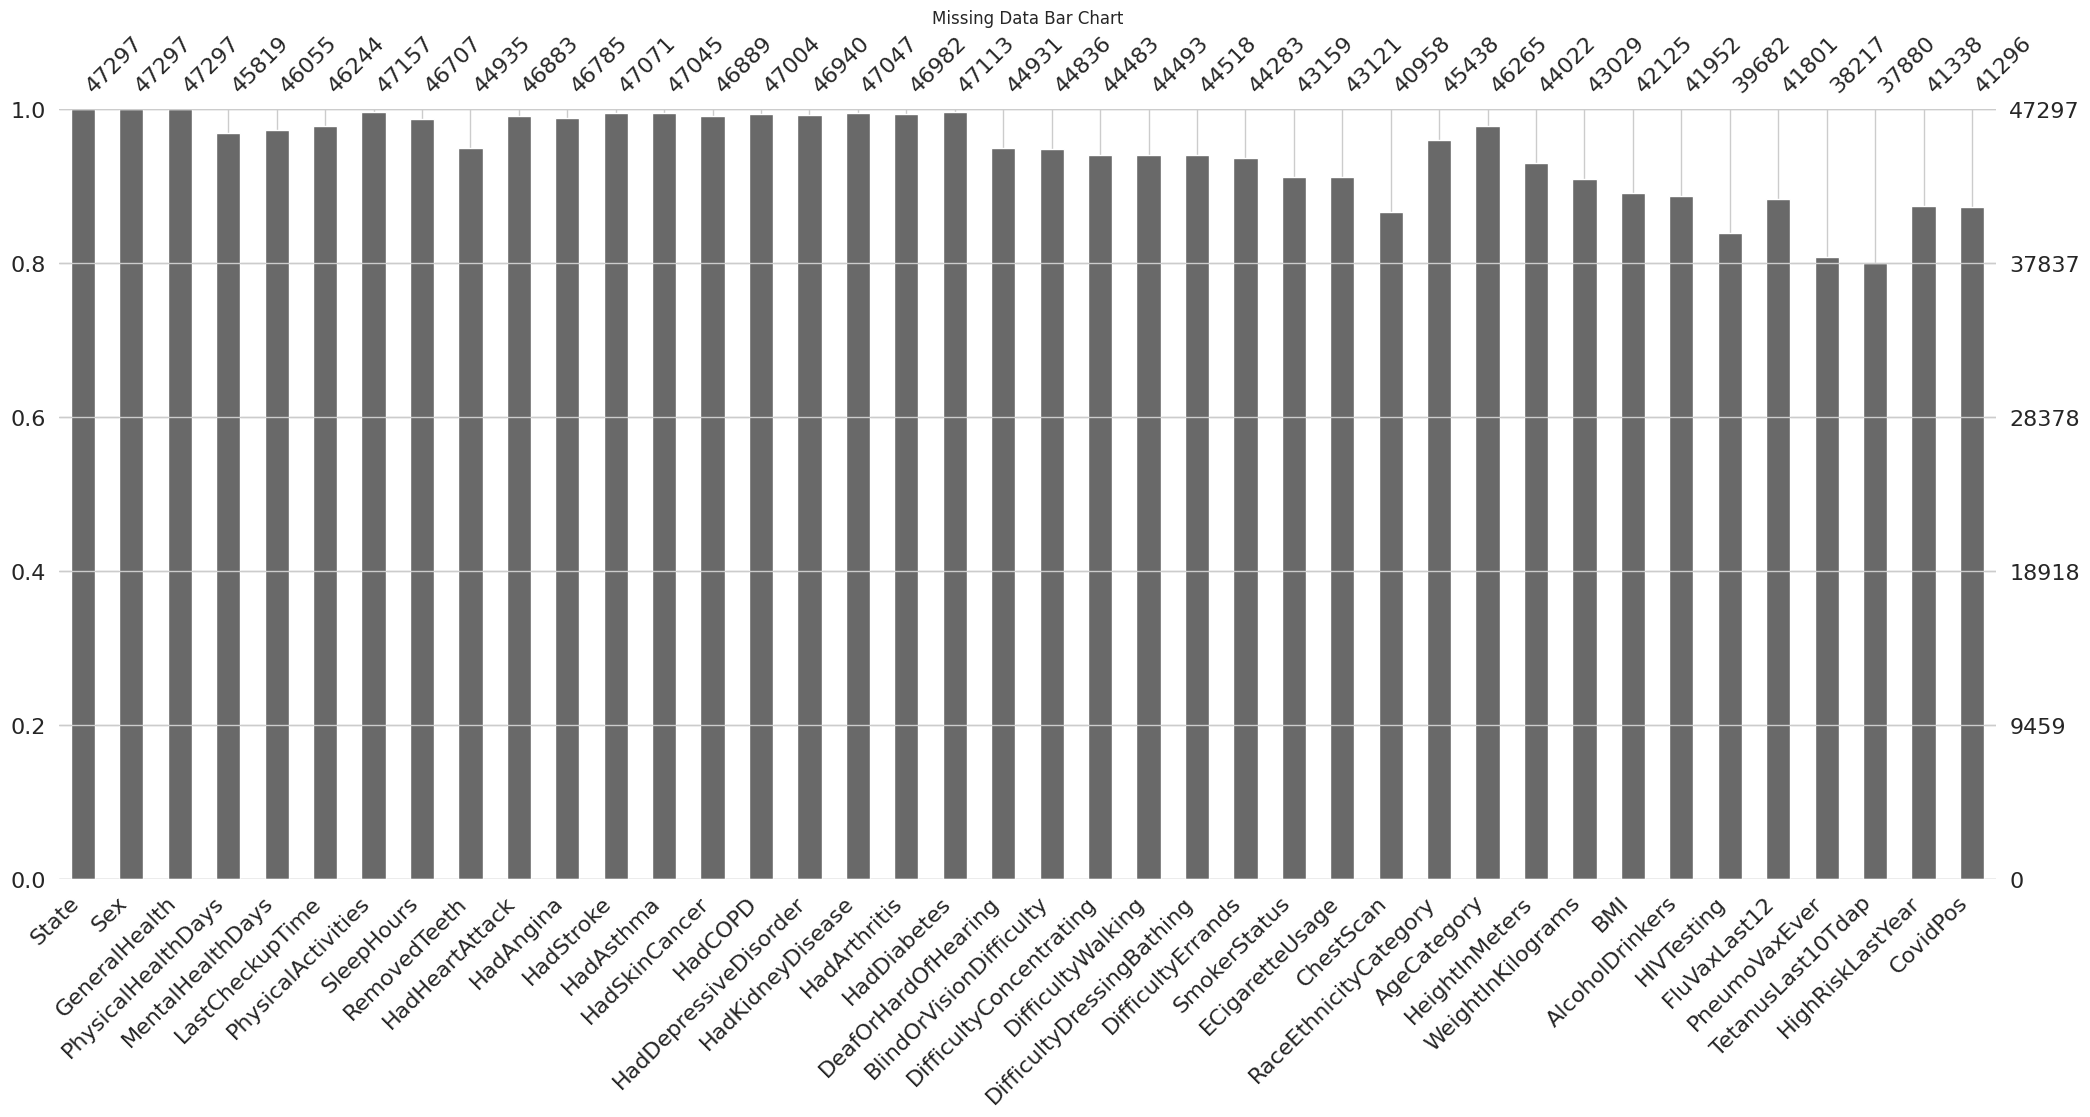

In [20]:
# Set the plot style for better aesthetics
# plt.style.use('seaborn')

# Step 1: Display the missing data matrix
plt.figure(figsize=(12, 6))
msno.matrix(heart)
plt.title('Missing Data Matrix')
plt.show()

# Step 2: Display a heatmap to see the correlation of missing values
# plt.figure(figsize=(10, 6))
# msno.heatmap(heart)
# plt.title('Missing Data Heatmap')
# plt.show()

# Step 3 (Optional): Display a bar chart of missing values count
plt.figure(figsize=(12, 6))
msno.bar(heart)
plt.title('Missing Data Bar Chart')
plt.show()


In [14]:
heart['GeneralHealth'].value_counts()

,count
GeneralHealth,
Very good,15506
Good,15082
Excellent,7815
Fair,6623
Poor,2271


<ipython-input-31-368fa4784890>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart, x='GeneralHealth', palette='viridis')


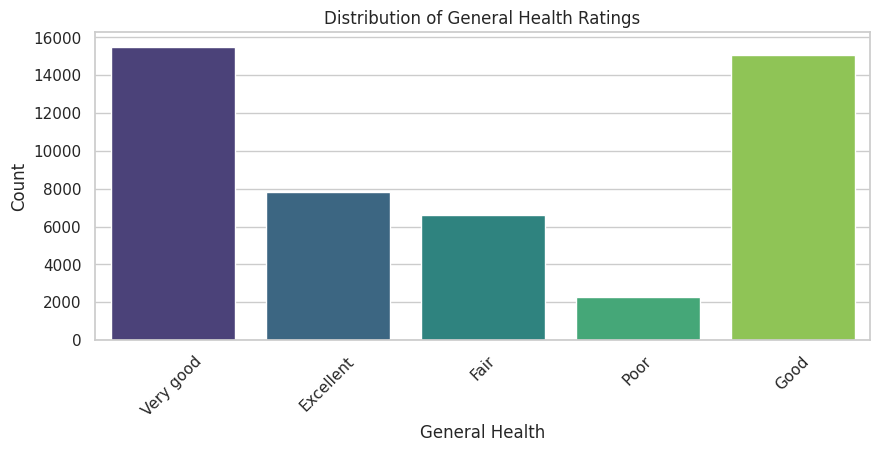

In [31]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Plotting the distribution of the 'GeneralHealth' column
plt.figure(figsize=(10, 4))
#sns.countplot(data=heart, x='GeneralHealth', order=heart['GeneralHealth'].value_counts().index,palette='viridis')
sns.countplot(data=heart, x='GeneralHealth', palette='viridis')


# Adding labels and title
plt.title('Distribution of General Health Ratings')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


- Use mode for each sex to fill in missing data

In [35]:
# #import pandas as pd

# # Assuming your dataset is stored in a DataFrame called 'df'
# # Step 1: Define a function to fill missing values with the mode for each group
def fill_mode(series):
     """Fill NaN values in the series with its mode."""
     mode_value = series.mode()[0] if not series.mode().empty else None
     return series.fillna(mode_value)

# Step 2: Apply the function to fill missing 'GeneralHealth' values grouped by 'Sex'
heart['GeneralHealth'] = heart.groupby('Sex')['GeneralHealth'].transform(fill_mode)

# # Check the result
# print(heart['GeneralHealth'])



In [36]:
heart.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,1053
PhysicalActivities,140
SleepHours,590
RemovedTeeth,2362
HadHeartAttack,414


- Physical Health Days visualization

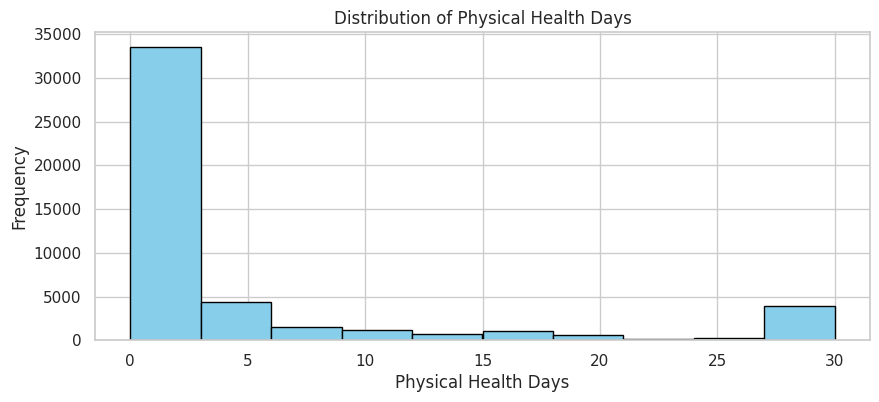

In [32]:
plt.figure(figsize=(10, 4))
plt.hist(heart['PhysicalHealthDays'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Physical Health Days')
plt.xlabel('Physical Health Days')
plt.ylabel('Frequency')
plt.show()

- use mode to fill for categorical data grouped by sex

In [21]:
# Step 1: Define a function to fill missing values with the mode for each group
def fill_mode(series):
    """Fill NaN values in the series with its mode."""
    mode_value = series.mode()[0] if not series.mode().empty else None
    return series.fillna(mode_value)

# Step 2: Apply the function to fill missing 'GeneralHealth' values grouped by 'Sex'
heart['PhysicalHealthDays'] = heart.groupby('Sex')['PhysicalHealthDays'].transform(fill_mode)

# Check the result
#print(heart['PhysicalHealthDays'])

0         0.0
1         0.0
2         2.0
3         0.0
4         2.0
         ... 
47292     0.0
47293     0.0
47294     0.0
47295     0.0
47296    30.0
Name: PhysicalHealthDays, Length: 47297, dtype: float64


In [22]:
heart.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,1242
LastCheckupTime,1053
PhysicalActivities,140
SleepHours,590
RemovedTeeth,2362
HadHeartAttack,414


<ipython-input-38-715de19e2bf2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart, x='MentalHealthDays', palette='viridis')


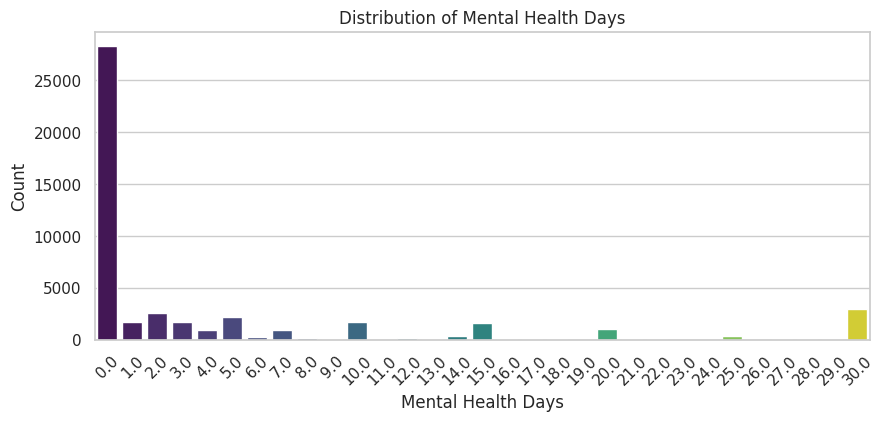

In [38]:
sns.set(style="whitegrid")

# Plotting the distribution of the 'GeneralHealth' column
plt.figure(figsize=(10, 4))
sns.countplot(data=heart, x='MentalHealthDays', palette='viridis')

# Adding labels and title
plt.title('Distribution of Mental Health Days')
plt.xlabel('Mental Health Days')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [23]:
# Step 1: Define a function to fill missing values with the mode for each group
def fill_mode(series):
    """Fill NaN values in the series with its mode."""
    mode_value = series.mode()[0] if not series.mode().empty else None
    return series.fillna(mode_value)

# Step 2: Apply the function to fill missing 'GeneralHealth' values grouped by 'Sex'
heart['MentalHealthDays'] = heart.groupby('Sex')['MentalHealthDays'].transform(fill_mode)

# Check the result
#print(heart['PhysicalHealthDays'])

In [24]:
heart.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,1053
PhysicalActivities,140
SleepHours,590
RemovedTeeth,2362
HadHeartAttack,414


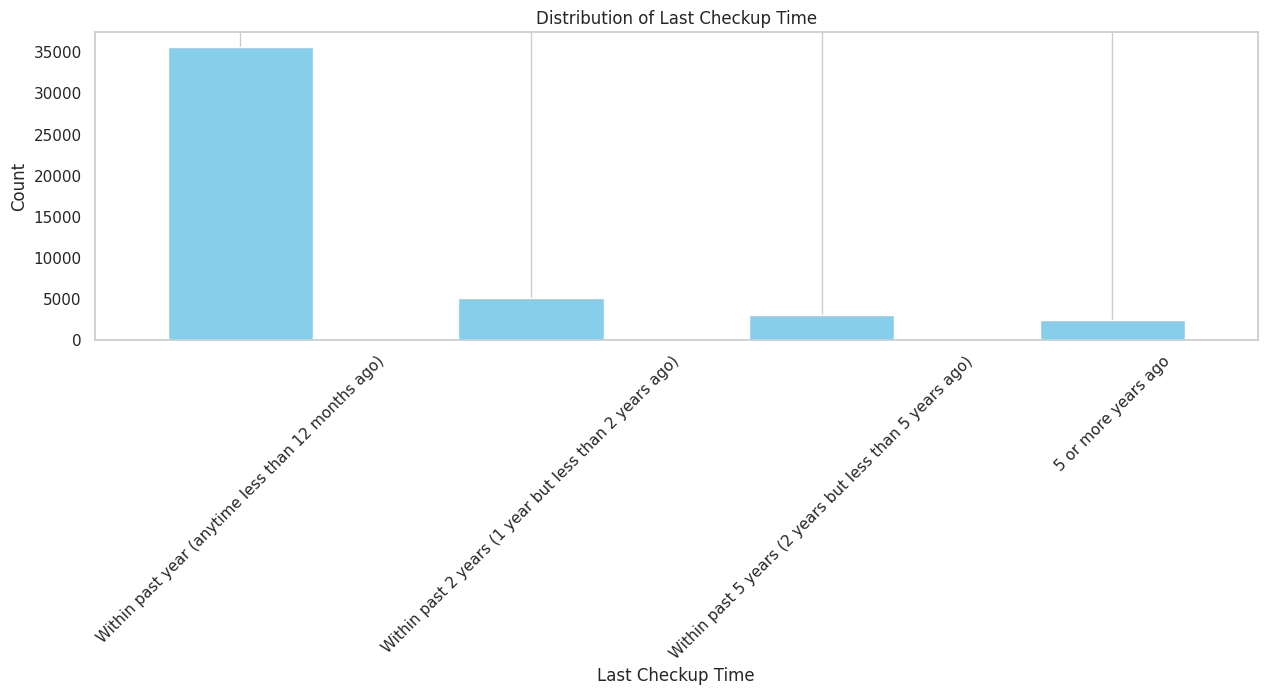

In [41]:
# Set plot size
plt.figure(figsize=(15, 4))

# Count the occurrences of each category and plot a bar chart
heart['LastCheckupTime'].value_counts().plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Distribution of Last Checkup Time')
plt.xlabel('Last Checkup Time')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')

# Display the plot
plt.show()


In [47]:
heart['LastCheckupTime'].value_counts()

,count
LastCheckupTime,
Within past year (anytime less than 12 months ago),35635
Within past 2 years (1 year but less than 2 years ago),5076
Within past 5 years (2 years but less than 5 years ago),3093
5 or more years ago,2440


In [50]:
# Step 1: Calculate the mode of the 'LastCheckupTime' column
mode_value = heart['LastCheckupTime'].mode()[0]  # mode() returns a Series, so use [0] to get the most frequent value

# Step 2: Fill missing values in 'LastCheckupTime' with the mode
heart['LastCheckupTime'].fillna(mode_value, inplace=True)

# Step 3: Verify if missing values are filled
#print(heart['LastCheckupTime'].isnull().sum())


0


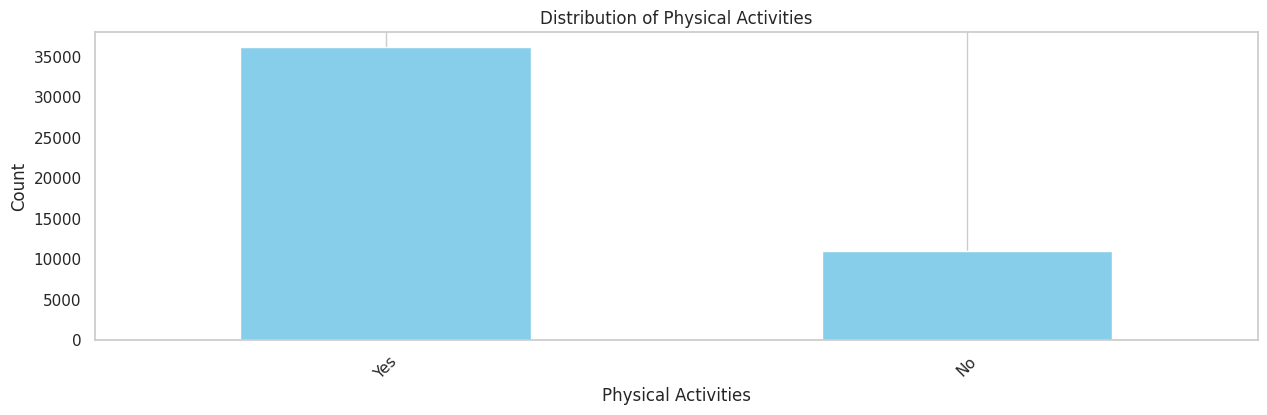

In [52]:
# Set plot size
plt.figure(figsize=(15, 4))

# Count the occurrences of each category and plot a bar chart
heart['PhysicalActivities'].value_counts().plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Distribution of Physical Activities')
plt.xlabel('Physical Activities')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')

# Display the plot
plt.show()

- use mode to fill in missing records in Physical activities

In [53]:
mode_value = heart['PhysicalActivities'].mode()[0]  # mode() returns a Series, so use [0] to get the most frequent value

# Step 2: Fill missing values in 'LastCheckupTime' with the mode
heart['PhysicalActivities'].fillna(mode_value, inplace=True)

<ipython-input-53-43bbdd28f0b7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['PhysicalActivities'].fillna(mode_value, inplace=True)


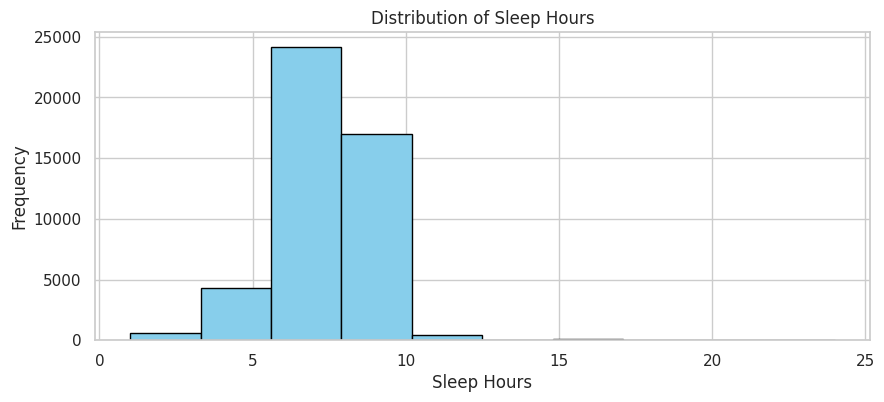

In [57]:
plt.figure(figsize=(10, 4))
plt.hist(heart['SleepHours'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

- use mean for skewed sleep hours distribution

In [58]:
#mean_value = heart['SleepHours'].mean()
heart['SleepHours'].fillna(heart['SleepHours'].mean(), inplace=True)

<ipython-input-58-b398d3df1dc1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['SleepHours'].fillna(heart['SleepHours'].mean(), inplace=True)


In [60]:
heart['RemovedTeeth'].value_counts()

,count
RemovedTeeth,
None of them,24788
1 to 5,13014
"6 or more, but not all",4547
All,2586


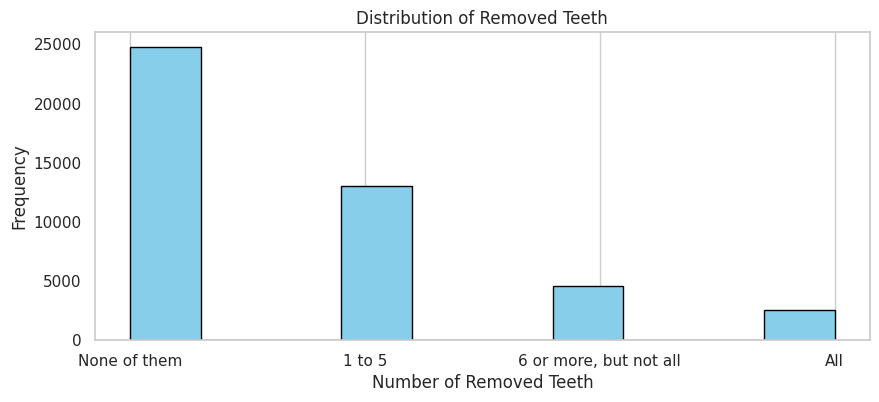

In [64]:
df = heart.dropna(subset=['RemovedTeeth'])

plt.figure(figsize=(10, 4))

plt.hist(df['RemovedTeeth'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Removed Teeth')
plt.xlabel('Number of Removed Teeth')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


- use mode for categorised removed teeth column

In [71]:
heart['RemovedTeeth'].fillna(heart['RemovedTeeth'].mode()[0], inplace=True)

<ipython-input-76-f30ef9118a32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HadHeartAttack', data=df, palette='Blues')


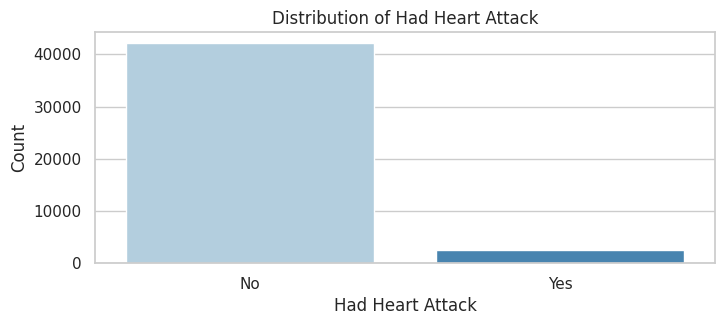

In [76]:
plt.figure(figsize=(8, 3))
sns.countplot(x='HadHeartAttack', data=df, palette='Blues')
plt.title('Distribution of Had Heart Attack')
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.show()

In [78]:
heart['HadHeartAttack'].fillna(heart['HadHeartAttack'].mode()[0], inplace=True)

<ipython-input-78-685221d7efb0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['HadHeartAttack'].fillna(heart['HadHeartAttack'].mode()[0], inplace=True)


<ipython-input-77-175fe9d89b1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HadAngina', data=df, palette='Blues')


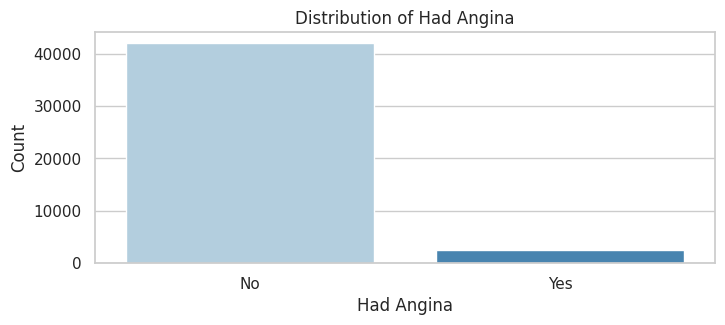

In [77]:
plt.figure(figsize=(8, 3))
sns.countplot(x='HadAngina', data=df, palette='Blues')
plt.title('Distribution of Had Angina')
plt.xlabel('Had Angina')
plt.ylabel('Count')
plt.show()

In [79]:
heart['HadAngina'].fillna(heart['HadAngina'].mode()[0], inplace=True)

<ipython-input-79-4886a5599d44>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['HadAngina'].fillna(heart['HadAngina'].mode()[0], inplace=True)


<ipython-input-81-b6d9894b393a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HadStroke', data=df, palette='Blues')


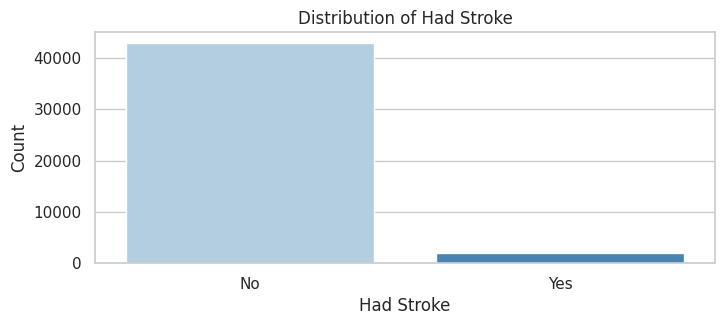

In [81]:
plt.figure(figsize=(8, 3))
sns.countplot(x='HadStroke', data=df, palette='Blues')
plt.title('Distribution of Had Stroke')
plt.xlabel('Had Stroke')
plt.ylabel('Count')
plt.show()

In [82]:
heart['HadStroke'].fillna(heart['HadStroke'].mode()[0], inplace=True)

<ipython-input-82-314183827810>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['HadStroke'].fillna(heart['HadStroke'].mode()[0], inplace=True)


In [84]:
heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [93]:
heart['HadAsthma'].fillna(heart['HadAsthma'].mode()[0], inplace=True)
heart['HadSkinCancer'].fillna(heart['HadSkinCancer'].mode()[0], inplace=True)
heart['HadCOPD'].fillna(heart['HadCOPD'].mode()[0], inplace=True)
heart['HadDepressiveDisorder'].fillna(heart['HadDepressiveDisorder'].mode()[0], inplace=True)
heart['HadKidneyDisease'].fillna(heart['HadKidneyDisease'].mode()[0], inplace=True)
heart['HadArthritis'].fillna(heart['HadArthritis'].mode()[0], inplace=True)
heart['HadDiabetes'].fillna(heart['HadDiabetes'].mode()[0], inplace=True)
heart['DeafOrHardOfHearing'].fillna(heart['DeafOrHardOfHearing'].mode()[0], inplace=True)
heart['BlindOrVisionDifficulty'].fillna(heart['BlindOrVisionDifficulty'].mode()[0], inplace=True)
heart['DifficultyConcentrating'].fillna(heart['DifficultyConcentrating'].mode()[0], inplace=True)
heart['DifficultyWalking'].fillna(heart['DifficultyWalking'].mode()[0], inplace=True)
heart['DifficultyDressingBathing'].fillna(heart['DifficultyDressingBathing'].mode()[0], inplace=True)
heart['DifficultyErrands'].fillna(heart['DifficultyErrands'].mode()[0], inplace=True)
heart['SmokerStatus'].fillna(heart['SmokerStatus'].mode()[0], inplace=True)
heart['ECigaretteUsage'].fillna(heart['ECigaretteUsage'].mode()[0], inplace=True)
heart['ChestScan'].fillna(heart['ChestScan'].mode()[0], inplace=True)
heart['RaceEthnicityCategory'].fillna(heart['RaceEthnicityCategory'].mode()[0], inplace=True)
heart['AgeCategory'].fillna(heart['AgeCategory'].mode()[0], inplace=True)
heart['AlcoholDrinkers'].fillna(heart['AlcoholDrinkers'].mode()[0], inplace=True)
heart['HIVTesting'].fillna(heart['HIVTesting'].mode()[0], inplace=True)
heart['FluVaxLast12'].fillna(heart['FluVaxLast12'].mode()[0], inplace=True)
heart['PneumoVaxEver'].fillna(heart['PneumoVaxEver'].mode()[0], inplace=True)
heart['HighRiskLastYear'].fillna(heart['HighRiskLastYear'].mode()[0], inplace=True)
heart['CovidPos'].fillna(heart['CovidPos'].mode()[0], inplace=True)
heart['TetanusLast10Tdap'].fillna(heart['TetanusLast10Tdap'].mode()[0], inplace=True)

<ipython-input-93-249c8adc267d>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['TetanusLast10Tdap'].fillna(heart['TetanusLast10Tdap'].mode()[0], inplace=True)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

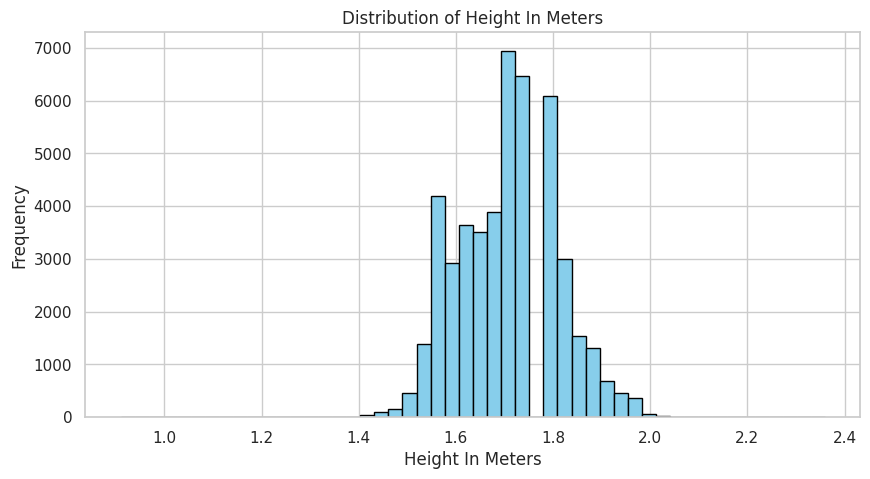

In [109]:
plt.figure(figsize=(10, 5))
plt.hist(heart['HeightInMeters'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Height In Meters')
plt.xlabel('Height In Meters')
plt.ylabel('Frequency')
plt

- Use mean for normal distribution of height in meters

In [105]:
heart['HeightInMeters'].fillna(heart['HeightInMeters'].median(), inplace=True)

<ipython-input-105-8d241a7cfa07>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['HeightInMeters'].fillna(heart['HeightInMeters'].median(), inplace=True)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

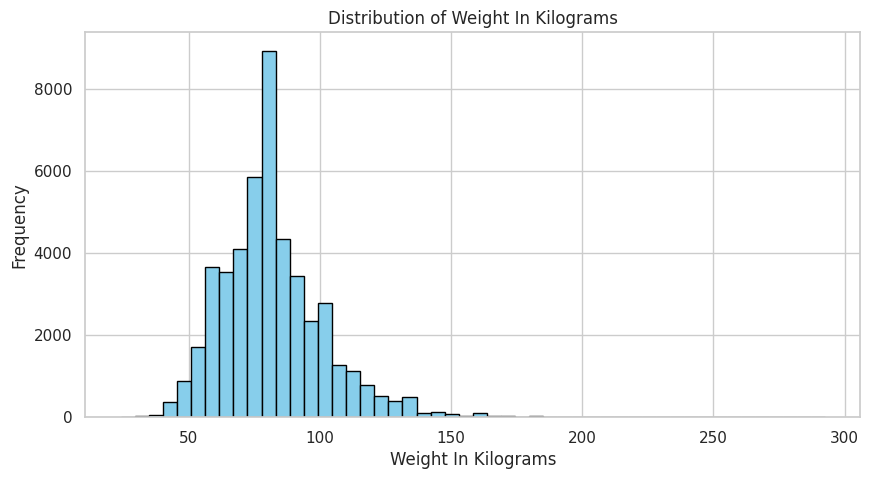

In [108]:
plt.figure(figsize=(10, 5))
plt.hist(heart['WeightInKilograms'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Weight In Kilograms')
plt.xlabel('Weight In Kilograms')
plt.ylabel('Frequency')
plt

- Use median for skewed weight distribution

In [106]:
heart['WeightInKilograms'].fillna(heart['WeightInKilograms'].median(), inplace=True)

<ipython-input-106-5e460e25a646>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['WeightInKilograms'].fillna(heart['WeightInKilograms'].median(), inplace=True)


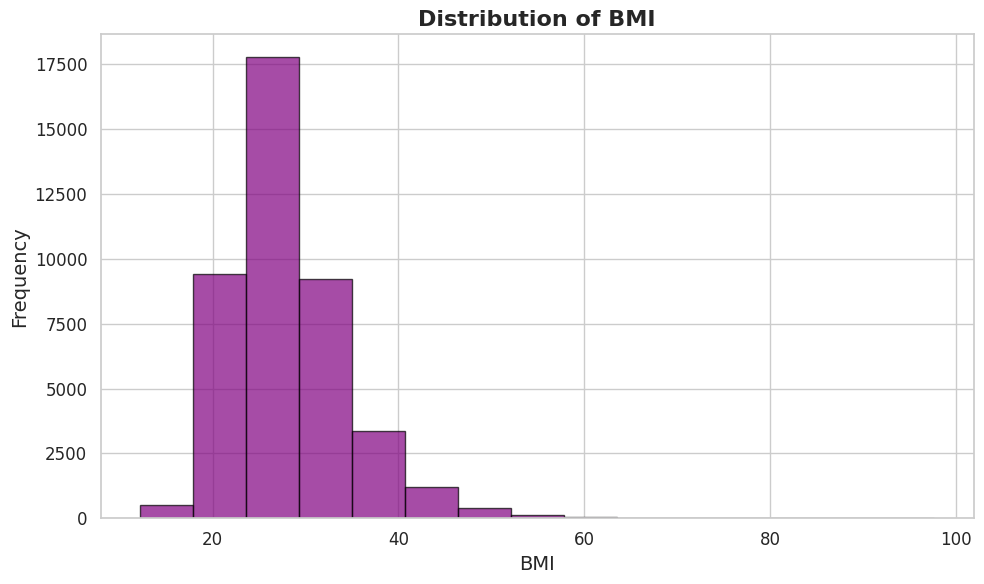

In [110]:
plt.figure(figsize=(10, 6))
plt.hist(heart['BMI'], bins=15, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of BMI', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # Adjusts spacing to avoid clipping
plt.show()

- Use median for BMI distribution

In [114]:
#heart['BMI'].fillna(heart['BMI'].median(), inplace=True)
heart.fillna({'BMI': heart['BMI']}, inplace=True)

In [88]:
heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [115]:
heart.isnull().sum()


,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


# Creat a copy of cleaned dataframe as csv file

In [116]:
heart.to_csv('heartCleanData.csv', index=False)

# DATA VISUALIZATION

In [117]:
heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

# Correlation heatmap

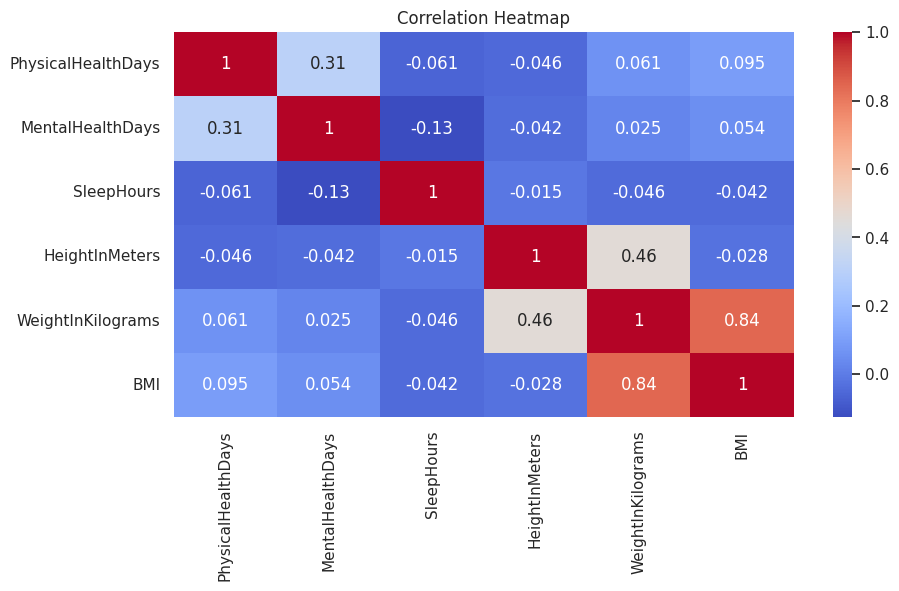

In [118]:
#Select only numeric columns for correlation
heart_numeric = heart.select_dtypes(include=['float64', 'int64'])

#Heatmap to show correlation
plt.figure(figsize=(10, 5))
sns.heatmap(heart_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Strong correlation between BMI and Weight in Kilograms
- Moderate correlation between Height in meters and weight in kilograms

# - Correlation between BMI and Weight in kilograms

In [127]:
fig = px.scatter(heart,
                 x='BMI',
                 y='WeightInKilograms',
                 title='Scatter Plot of BMI vs Weight',
                 labels={'BMI': 'Body Mass Index (BMI)', 'WeightInKilograms': 'Weight (kg)'},
                 color='Sex',  # You can color the points by 'Sex' or another column if needed
                 opacity=0.7,  # Set transparency for better visibility of overlapping points
                 color_discrete_sequence=px.colors.qualitative.Set1)  # Customize the color palette

# Customize layout (optional)
fig.update_layout(
    xaxis_title='BMI',
    yaxis_title='Weight (kg)',
    showlegend=True  # Show legend for coloring
)

# Show the plot
fig.show()


- There is a positive correlation between BMI and weight, but it's not perfectly linear. This means that as weight increases, BMI tends to increase as well, but the points don't fall on a straight line.
- It is worth mentioning that from the graph, men tend to weigh slightly more than women for the same amount of BMI

# Comparing General health of every state

In [126]:
# Create a bar plot using Plotly to compare 'GeneralHealth' across different 'State'
fig = px.histogram(heart,
                   x='State',
                   color='GeneralHealth',
                   category_orders={'GeneralHealth': ['Excellent', 'Very good','Good', 'Fair', 'Poor']},  # Adjust the order as needed
                   title='Comparison of General Health Across States',
                   labels={'State': 'State', 'count': 'Count of General Health Categories'},
                   color_discrete_sequence=px.colors.qualitative.Set2)  # You can customize the color sequence

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Count of General Health Categories',
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the plot
fig.show()


The general health across the states of Alaska, Alabama, Arizona, Arkansas, California, Colorado, and Connecticut varies significantly, with each state having unique challenges and strengths in public health metrics.

- Alaska: Alaskans tend to have relatively high rates of mental and physical health challenges, with lower access to healthcare in remote areas being a key issue. However, the state's healthcare expenditures per capita are also relatively high compared to national averages​.

- Alabama: Alabama has some of the worst health outcomes in the nation, particularly in terms of chronic diseases like obesity and smoking. The state struggles with higher rates of obesity, tobacco use, and heart disease​
America’s Health Rankings.

- Arizona: Arizona has mixed health outcomes, with better-than-average access to healthcare and lower obesity rates compared to southern states, but still facing significant issues with diabetes and high rates of uninsured residents​.

- Arkansas: Like Alabama, Arkansas faces high levels of obesity and chronic health conditions. The state has worked on improving health insurance coverage but still faces challenges in reducing mortality rates linked to preventable diseases​
America’s Health Rankings
.

- California: Known for its robust public health initiatives, California has healthier populations, lower rates of smoking, and comprehensive public health programs. It also has a strong emphasis on preventative healthcare​
America’s Health Rankings
.

- Colorado: Colorado consistently ranks among the healthiest states in the U.S., with relatively low obesity rates, high physical activity levels, and good access to healthcare services. However, like other states, it faces challenges such as rising mental health issues​
Home
.

- Connecticut: Connecticut is generally healthier than many other states, with low rates of smoking and obesity, and higher life expectancy. However, disparities in health outcomes can still be found based on socioeconomic factors​
America’s Health Rankings.



In summary, California and Colorado stand out for their healthier populations, while states like Alabama and Arkansas face significant health challenges due to higher rates of obesity, smoking, and chronic diseases. Alaska, Arizona, and Connecticut show mixed results with ongoing efforts to improve overall public health

In [136]:
# Filter the data to only include rows where GeneralHealth is Excellent
df_excellent_health = heart[heart['GeneralHealth'] == 'Excellent']

# Group by 'State' and get the count of people with Excellent health in each state
df_grouped = df_excellent_health['State'].value_counts().reset_index(name='Count')
df_grouped.columns = ['State', 'Count']  # Renaming columns for clarity

# Create a pie chart to compare the percentage of Excellent health in each state
fig = px.pie(df_grouped,
             names='State',
             values='Count',
             title='Percentage of People with Excellent General Health by State',
             labels={'State': 'State', 'Count': 'Count of Excellent Health'},
             color_discrete_sequence=px.colors.qualitative.Set3)  # Customize color palette

# Show the plot
fig.show()


In [137]:
heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [145]:
# Create the histogram
fig = px.histogram(
    heart,
    x='Sex',  # The column for the x-axis
    nbins=10,         # Number of bins
    title='Sample size by Sex',
    labels={'Sex': 'Sex'},  # Label for the x-axis
    color='Sex'
    #color_discrete_sequence=['#440154'], # Using a color similar to the 'viridis' colormap
)

# Update layout to customize axis labels and title
fig.update_layout(
    xaxis_title="Sex",
    yaxis_title="Frequency",
    title_font_size=15,
    xaxis_tickfont=dict(size=12, color='black'),
    yaxis_tickfont=dict(size=12, color='black'),
    title_font=dict(size=15, color='black'),
    width=800,
    height=500
)

# Show the interactive plot
fig.show()



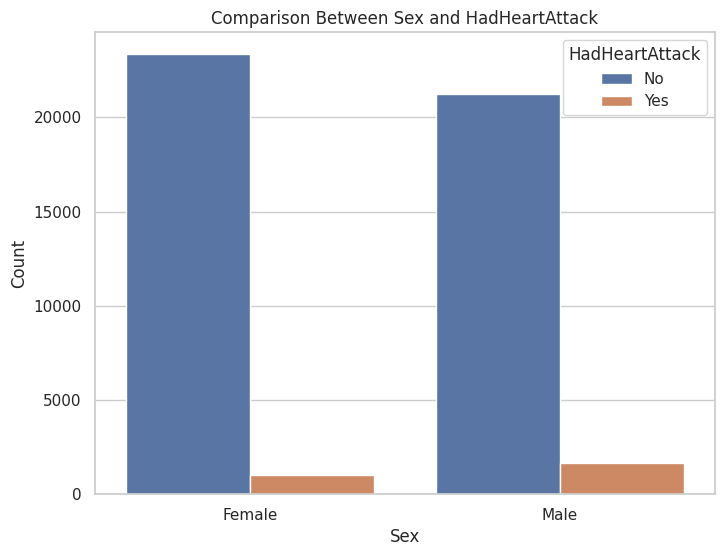

In [139]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='HadHeartAttack', data=heart)

plt.title('Comparison Between Sex and HadHeartAttack')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='HadHeartAttack', loc='upper right')
plt.show()


Men are more likely to have heart attacks than women in the sampled states. This is due to a combination of biological, behavioral, and lifestyle factors:

 **Biological Differences:**

- Hormonal Protection: Women are generally protected from heart disease earlier in life due to estrogen, which helps protect the cardiovascular system. This protective effect typically diminishes after menopause, which is why the incidence of heart disease in women increases later in life.
- Men often have higher levels of risk factors such as high blood pressure, high cholesterol, and diabetes at younger ages compared to women . These factors ie likelihood of cardiovascular issues, including heart attacks.

**Behavioural and lifestyle factors**

- Men are more likely to smoke and drink alcohol excessively, which are key contributors to heart disease .

- Lifestyle choices such as a lack of exercise, poor diet, and higher rates of obesity are more prevalent in men, contributing to a higher incidence of heart disease .

- Men may be more likely to ignore early warning signs of heart disease or delay seeking medical help, which increases the risk of a heart attack. In addition, they may not be as proactive as women in managing their health.

- Genetic Factors: Family history a play a role in heart disease risk, and men are more likely to experience heart attacks at an earlier age due to genetic predispositions .

These factors combine to create a higher likelihoodattacks in men, particularly at younger ages, though the gender gap narrows with age. Women’s risks tend to increase after menopause due to the loss of estrogen's protective effects.

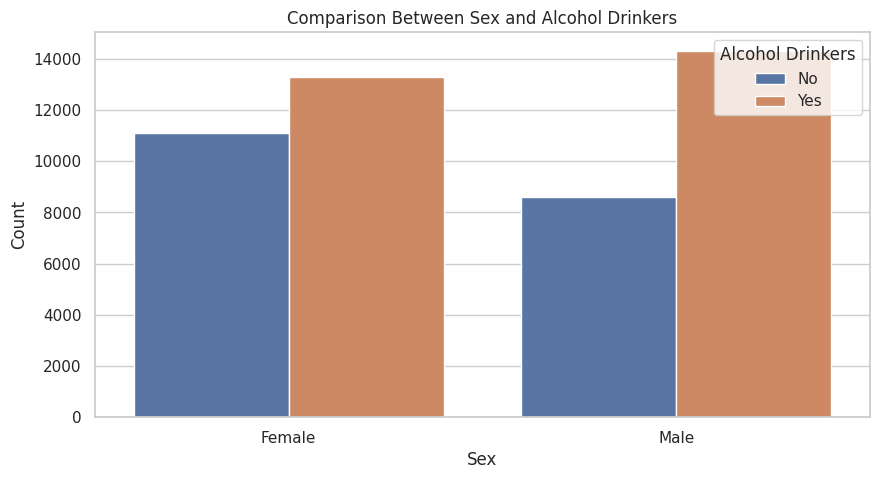

In [151]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='AlcoholDrinkers', data=heart)

plt.title('Comparison Between Sex and Alcohol Drinkers')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Alcohol Drinkers', loc='upper right')
plt.show()

- Men consumed alcohol more than women which may explain the higher rates of heart attacks in men.

Alcohol consumption can increase the risk of a heart attack for a number of reasons, including:
- Alcohol can cause high blood pressure, which can strain the heart over time and increase the risk of plaque buildup in blood vessels.
- Alcohol can increase weight gain which can lead to higher levels of cholesterol, accentuating the chances of a heart attack.
- Alcohol consumption can lead to Cardiomyopathy. Heavy drinking can damage the heart muscle, causing it to stretch and enlarge. This weakens the heart muscle and makes it less effective at pumping blood

# Comparing Had heart attack vs State

In [160]:
# Filter the dataset to include only rows where HadHeartAttack is Yes
heart_attack_df = heart[heart['HadHeartAttack'] == 'Yes']

# Count the number of people with heart attacks per state
state_heart_attack_counts = heart_attack_df['State'].value_counts().reset_index()
state_heart_attack_counts.columns = ['State', 'HeartAttackCount']

# Create a bar plot to compare heart attack counts for each state
fig = px.bar(state_heart_attack_counts,
             x='State',
             y='HeartAttackCount',
             title='Heart Attack Cases by State',
             labels={'HeartAttackCount': 'Number of Cases', 'State': 'State'},
             color='HeartAttackCount',
             color_continuous_scale='Blues')

# Show the plot
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


Arizona had the highest number of heart attack cases while Connecticut had the least number of cases.

- Arizona has a significant elderly population, especially in cities like Phoenix and Tucson that attract retirees due to the warm climate. As heart attack risk increases with age, a larger older population could contribute to higher reported cases contrast, Connecticut tends to have a more evenly distributed age demographic, which may result in fewer heart attack cases overall.

- Arizona is known for having high rates of obesity and sedentary lifestyles, particularly in rural areas where access to fitness facilities and health education may be limited .
Connecticut generally has a higher socioeconomic status and more access to healthcare resources, which may encourage healthier lifestyles and proactive healthcare behaviors, potentially reducing the incidence of heart attacks.

- Arizona's extremely hot climate, especially during the summer, can place additional stress on the cardiovascular system, which might exacerbate existing heart conditions or increase the likelihood of heart attacks. Connecticut has more moderate climate, does not face the same level of extreme heat, potentially reducing stress on the heart.

- Despite having high-quality healthcare facilities in urban areas, some regions in Arizona, especially rural parts, may face healthcare disparities, including less frequent preventive care and delayed treatment for heart-related symptoms .
Connecticut with more healthcare providers and generally better access to medical services, may see more effective management of heart disease and risk factors, leading to fewer severe outcomes like heart attacks.

- Rates of smoking, high blood pressure, and diabetes are often higher in Arizona compared to Connecticut, according to various public health reports. These are significant risk factors for heart attacks .
Additionally, the prevalence drinking and lack of regular health checkups could also contribute to higher heart attack rates in Arizona.

These factors illustrate how the interplay of demographics, lifestyle, healthcare access, and environmental conditions can lead to differences in heart attack rates between states like Arizona and Connecticut.

**Comparing Age categories betweeen Arizona and Connecticut**

In [172]:
import pandas as pd
import plotly.express as px

# Filter data for Arizona and Connecticut
filtered_df = heart[(heart['State'] == 'Arizona') | (heart['State'] == 'Connecticut')]

# Create a bar plot with Plotly
fig = px.histogram(
    filtered_df,
    x='AgeCategory',
    color='State',
    barmode='group',
    color_discrete_map={'Arizona': '#6495ED', 'Connecticut': '#800000'}
)

# Update layout for a clean white background
fig.update_layout(
    title='Comparison of Age Categories between Arizona and Connecticut',
    xaxis_title='Age Category',
    yaxis_title='Count',
    legend_title='State',
    plot_bgcolor='#FFFDD0',
    paper_bgcolor='white',
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


Arizona has notable elderly population compared to Connecticut which may explain the much higher cases of heart attacks in Arizona
Higher age groups experience more heart attacks due to a combination of biological and lifestyle factors:

- Aging of the Heart and Arteries: With age, arteries stiffen and lose elasticity, which can lead to higher blood pressure and a greater risk of plaque buildup, obstructing blood flow.

- Cumulative Risk Factors: Chronic conditions like high blood pressure, diabetes, and high cholesterol worsen over time, increasing cardiovascular risk. Older adults also have longer exposure to unhealthy lifestyle habits, such as poor diet and inactivity.

- Inflammation: Aging is associated with a low-grade chronic inflammation that contributes to plaque buildup and increases the risk of plaque rupture, which can cause heart attacks.

- Blood Clot Risks: Age-related changes in blood composition can lead to increased clotting, which can block arteries supplying the heart.

- Weaker Repair Mechanisms: Aging reduces the body's ability to repair heart tissue after damage, making recovery slower and less effective.

These combined factors lead to a higher incidence of heart attacks in older populations, emphasizing the need for preventive measures even in later years.

**Density plot for BMI comparison between Arizona and Connecticut**

In [175]:
# Filter the data for the two states: Arizona and Connecticut
filtered_df = heart[heart['State'].isin(['Arizona', 'Connecticut'])]

# Calculate the average BMI for each state
avg_bmi_df = filtered_df.groupby('State')['BMI'].mean().reset_index()

# Create a bar plot using Plotly
fig = px.bar(
    avg_bmi_df,
    x='State',
    y='BMI',
    color='State',
    color_discrete_map={'Arizona': '#6495ED', 'Connecticut': '#800000'},
    labels={'BMI': 'Average BMI', 'State': 'State'},
    title='Comparison of Average BMI: Arizona vs Connecticut',
    width=800,
    height=500
)

# Customize plot appearance
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(title='Average BMI'),
    xaxis=dict(title='State'),
    showlegend=False
)

# Display the plot
fig.show()


Arizona population has a relatively higher BMI compared to Connecticut. A higher BMI may account for more cases of heart attacks in Arizona.

A higher BMI (Body Mass Index) is linked to an increased risk of heart attacks due to several factors:

- Increased Strain on the Heart: A higher BMI typically correlates with excess body fat, particularly visceral fat, which surrounds organs like the heart. This increases the heart's workload and can lead to cardiovascular problems, including hypertension (high blood pressure) and heart disease, both of which are risk factors for heart attacks.

- Metabolic and Hormonal Changes: Excess fat, especially abdominal fat, contributes to metabolic syndrome. This syndrome includes a combination of conditions like high blood pressure, high cholesterol, and insulin resistance. All of these conditions increase the risk of atherosclerosis (the buildup of fatty deposits in arteries), which can block blood flow and lead to heart attacks.

- Obesity causes low-grade chronic inflammation in the body, which can damage the walls of blood vessels. This damage promotes the buildup of plaque in the arteries, which narrows and hardens the arteries, leading to a higher risk of heart attacks.

- Impaired Lipid Metabolism: Individuals with higher BMIs often have an imbalance in their lipid profiles, including higher levels of LDL cholesterol ("bad" cholesterol) and triglycerides, and lower levels of HDL cholesterol ("good" cholesterol). These factors contribute to the formation of plaque in the arteries, which can lead to blockages and increase the likelihood of heart attacks.


In [146]:
heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')